In [1]:
#Problem Statement 1: Build and train a Logistic Regression Model to do binary classification of iris flowers using the iris dataset. 
#In particular, the model should predict whether a particular iris flower instance belongs to the class Iris Virginica or not using 
#only petal width as the input feature.

import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print(type(iris))
print(list(iris.keys()))
X = iris["data"][:,3:] # petal width
y = (iris["target"] == 2).astype(np.int64) # 1 if Iris-Virginica, else 0


<class 'sklearn.utils._bunch.Bunch'>
['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X,y)

LogisticRegression(random_state=42)

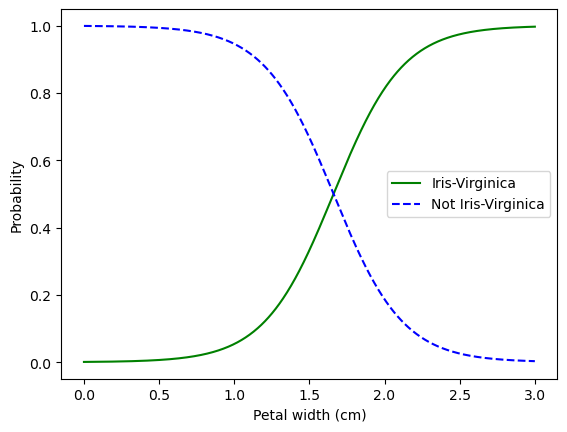

In [3]:
import matplotlib.pyplot as plt
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:,1],"g-")
plt.plot(X_new, y_proba[:,0], "b--")
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')
plt.legend(['Iris-Virginica','Not Iris-Virginica'])
#print(log_reg.predict(X))
#print(log_reg.coef_)
#print(log_reg.intercept_)

#The petal width of Iris-Virginica flowers (represented by triangles) ranges from 1.4 cm to 2.5 cm, 
#while the other iris flowers (represented by squares) generally have a smaller petal width, ranging from 0.1 cm to 1.8 cm.

#There is a bit of overlap. Above about 2 cm the classifier is highly confident that the flower is an Iris-Virginica 
#(it outputs a high probability to that class), while below 1 cm it is highly confident that it is not an Iris-Virginica 
#(high probability for the “Not Iris-Virginica” class). In between these extremes, the classifier is unsure.

#There is a decision boundary at around 1.6 cm where both probabilities are equal to 50%: if the petal width is higher than 1.6 cm,
#the classifier will predict that the flower is an Iris-Virginica, or else it will predict that it is not


In [4]:
log_reg.predict([[1.7],[1.5]])

array([1, 0], dtype=int64)

(100000, 2)


(2.9, 7.0, 0.8, 2.7)

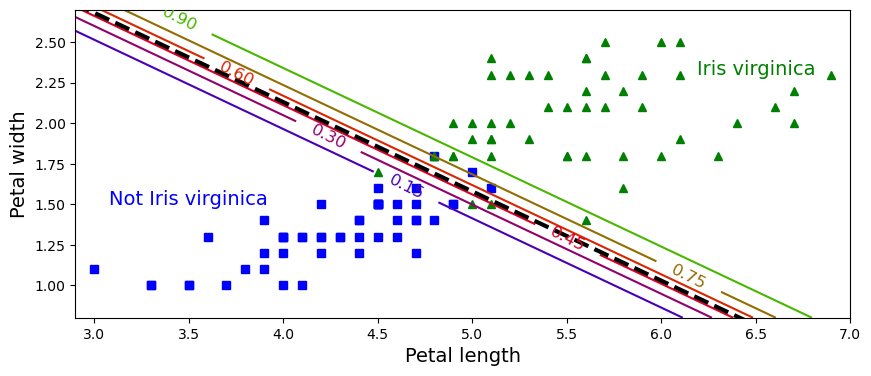

In [5]:
#Problem Statement 2: Logistic Regression for predicting class using two features: Petal length and width.

from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int64)

log_reg2 = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg2.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
print(X_new.shape)

y_proba = log_reg2.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
left_right = np.array([2.9, 7])
boundary = -(log_reg2.coef_[0][0] * left_right + log_reg2.intercept_[0]) / log_reg2.coef_[0][1]
plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

#The dashed line represents the points where the model estimates a 50% probability. 
#This is the models decision boundary. Note that it is a linear boundary.

#Each parallel line represents the points where the model outputs a specific probability, 
#from 15% (bottom left) to 90% (top right). 
#All the flowers beyond the top-right line have an over 90% chance of being Iris-Virginica according to the model.